Импортируем библиотеку

In [1]:
%%time
from TSEnsemble import utils, nn, arima

CPU times: total: 5.03 s
Wall time: 5.63 s


Преобразуем .csv файл в DataFrame, состоящий из 1 столбца со значениями <br> временного ряда (column) и индекса, содержащего даты (index).

In [2]:
%%time
path = "datasets\\yahoo_stock.csv"
dataset = utils.ts_from_csv(path, column = 3, index = 0)


CPU times: total: 31.2 ms
Wall time: 38 ms


Декомпозируем временной ряд на составляющие: тренд, сезонность, остатки.

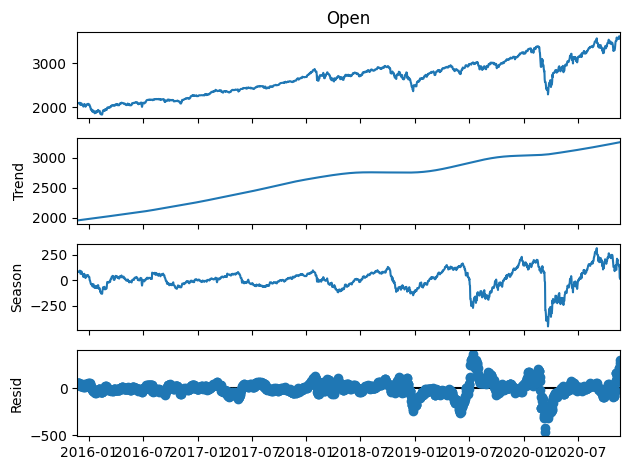

CPU times: total: 2.2 s
Wall time: 2.2 s


In [3]:
%%time
utils.plot_decompose(path, period = 252, column = 3, index = 0)

Строим функцию автокорелляции для временного ряда, по ней можно увидеть сезонность ряда.

CPU times: total: 46.9 ms
Wall time: 51 ms


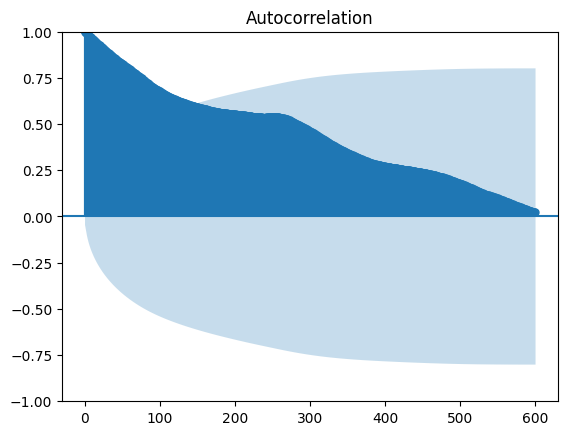

In [4]:
%%time
from statsmodels.graphics.tsaplots import plot_acf
utils.plot_acf(path, lags = 600, column = 3, index = 0)

Проверим ряд на стационарность, используя 2 теста: KPSS и ADF. <br> Также нарисуем график временного ряда, средних значений и стандартных <br>отклонений прошлых window значений (по умолчанию 2% датасета)

ADF test: 
 stat        -0.713598
pval         0.843196
lags        25.000000
numobs    1799.000000
1%          -3.433990
5%          -2.863148
10%         -2.567626
dtype: float64
KPSS test:  stat     5.915569
pval     0.010000
lags    27.000000
10%      0.347000
5%       0.463000
2.5%     0.574000
1%       0.739000
dtype: float64
CPU times: total: 109 ms
Wall time: 131 ms


C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:172: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_kpss = kpss(ts)


False

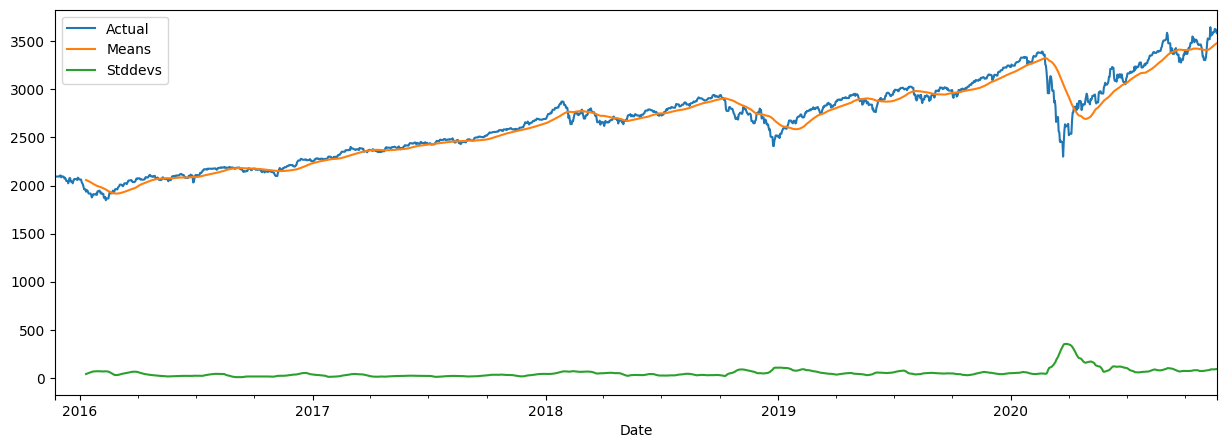

In [5]:
%%time
utils.isStationary(path, window = 50, plot = True)

Автоматически найдем наиболее оптимальные коэффициенты <br> для SARIMA модели по критерию AIC и построим модель.

C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:250: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_kpss = kpss(ts)
C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:250: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  test_kpss = kpss(ts)


ARIMA[2, 1, 2] AIC:inf  Time_Taken:1.047
ARIMA[0, 1, 0] AIC:15553.739  Time_Taken:0.016
ARIMA[1, 1, 0] AIC:15555.144  Time_Taken:0.031
ARIMA[0, 1, 1] AIC:15555.189  Time_Taken:0.094
ARIMA[1, 1, 0] AIC:15555.144  Time_Taken:0.047
ARIMA[0, 1, 1] AIC:15555.189  Time_Taken:0.094
ARIMA[1, 1, 1] AIC:15552.018  Time_Taken:0.219
ARIMA[0, 1, 1] AIC:15555.189  Time_Taken:0.078
ARIMA[1, 1, 0] AIC:15555.144  Time_Taken:0.031
ARIMA[2, 1, 1] AIC:15552.338  Time_Taken:0.281
ARIMA[1, 1, 2] AIC:15551.916  Time_Taken:0.172
ARIMA[0, 1, 2] AIC:15554.364  Time_Taken:0.141
ARIMA[1, 1, 1] AIC:15552.018  Time_Taken:0.203
ARIMA[2, 1, 2] AIC:inf  Time_Taken:1.000
ARIMA[1, 1, 3] AIC:15549.883  Time_Taken:0.250
ARIMA[0, 1, 3] AIC:15548.046  Time_Taken:0.172
ARIMA[0, 1, 2] AIC:15554.364  Time_Taken:0.156
ARIMA[1, 1, 3] AIC:15549.883  Time_Taken:0.250
ARIMA[1, 1, 2] AIC:15551.916  Time_Taken:0.203
ARIMA[0, 1, 2] AIC:15554.364  Time_Taken:0.156
ARIMA[1, 1, 3] AIC:15549.883  Time_Taken:0.266
ARIMA[1, 1, 2] AIC:15551.

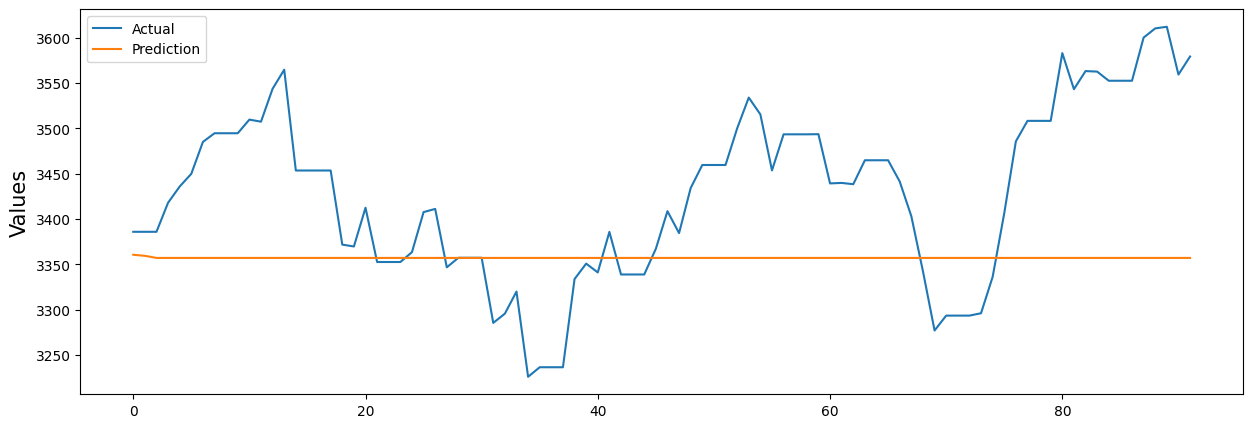

     prediction       actual
0   3360.685941  3386.010010
1   3359.517395  3386.010010
2   3357.197359  3386.010010
3   3357.197359  3418.090088
4   3357.197359  3435.949951
..          ...          ...
87  3357.197359  3600.159912
88  3357.197359  3610.310059
89  3357.197359  3612.090088
90  3357.197359  3559.409912
91  3357.197359  3579.310059

[92 rows x 2 columns]
RMSE = 117.79349604898539, MSE = 13875.307711442336, MAE = 95.89225438620653, MAPE = 0.027576476353784372
CPU times: total: 5.86 s
Wall time: 5.77 s


In [6]:
%%time
ar = arima.auto_arima(dataset,
                            method = 'stepwise',
                            max_p = 3,
                            max_q = 3,
                            max_Q = 3,
                            max_P = 3,
                            train_split = 0.95,
                            plot = True)

Построим CNN, LSTM, GRU, Transformer модели, пытаясь подобрать оптимальные параметры.

3/3 [==============================] - 0s 2ms/step


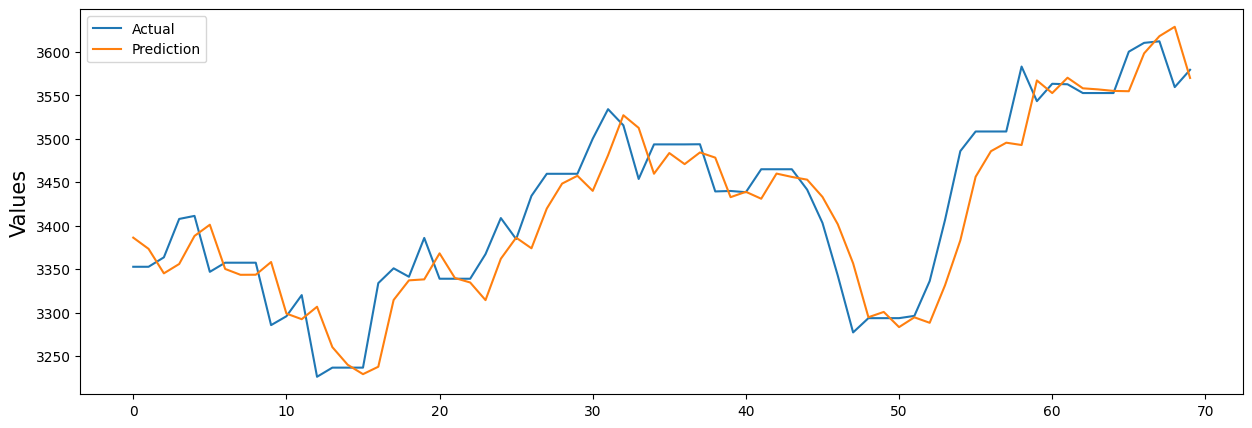

     prediction       actual
0   3596.952924  3386.010010
1   3415.349610  3386.010010
2   3375.605339  3386.010010
3   3334.555765  3418.090088
4   3400.942303  3435.949951
..          ...          ...
87  3554.662993  3600.159912
88  3598.235811  3610.310059
89  3618.020076  3612.090088
90  3628.811889  3559.409912
91  3569.944050  3579.310059

[92 rows x 2 columns]
RMSE = 45.967922483279594, MSE = 2113.0498974288016, MAE = 32.52316360854068, MAPE = 0.009509125324305865
CPU times: total: 8.91 s
Wall time: 6.08 s


In [7]:
%%time
cnn = nn.make_cnn(dataset,
                  look_back = 25,
                  hidden_layers = 1,
                    filters = 64,
#                  hidden_layers = 3,
#                 filters = 64,
                  train_size = 0.95,
                  kernel_size = 2,
                  batch_size = 12,
                  dilation_rate = 1,
                  dilation_mode = "multiplicative")

3/3 [==============================] - 0s 6ms/step


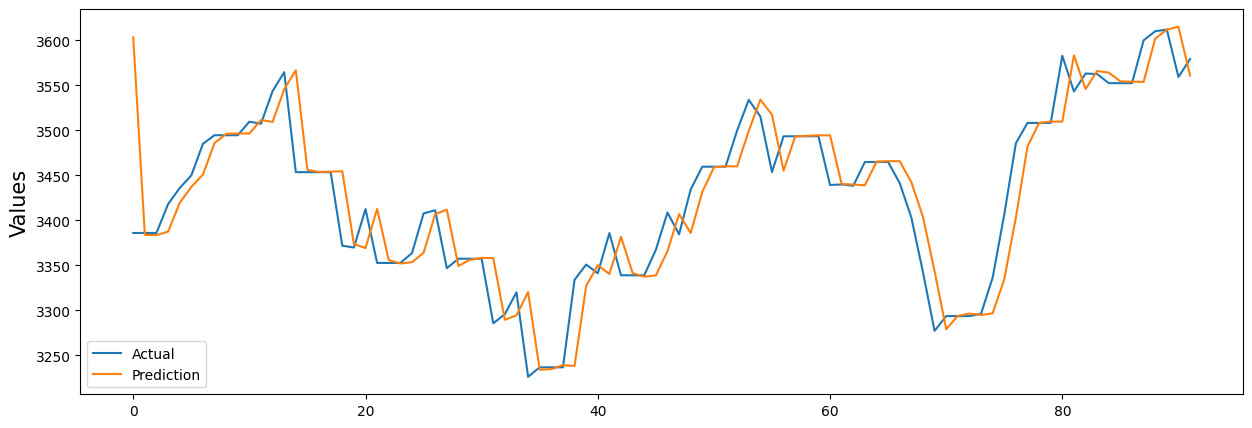

     prediction       actual
0   3603.453491  3386.010010
1   3383.896876  3386.010010
2   3383.609899  3386.010010
3   3387.525939  3418.090088
4   3419.393889  3435.949951
..          ...          ...
87  3553.935501  3600.159912
88  3601.988109  3610.310059
89  3612.093263  3612.090088
90  3615.223774  3559.409912
91  3561.059604  3579.310059

[92 rows x 2 columns]
RMSE = 42.771793325151236, MSE = 1829.426304249452, MAE = 26.43803464617758, MAPE = 0.007745766102116914
CPU times: total: 1min 48s
Wall time: 33.5 s


In [8]:
%%time
lstm = nn.make_rnn(dataset,
                  look_back = 25,
#                   units = [64,128,64],
#                   hidden_layers = 3,
                hidden_layers = 1,
                   units = 128,
                  train_size = 0.95,
                  type = "LSTM",
                  epochs = 20,
                  batch_size = 12,
                  dropout = 0.0,
                  maxPlot = 100)

3/3 [==============================] - 0s 4ms/step


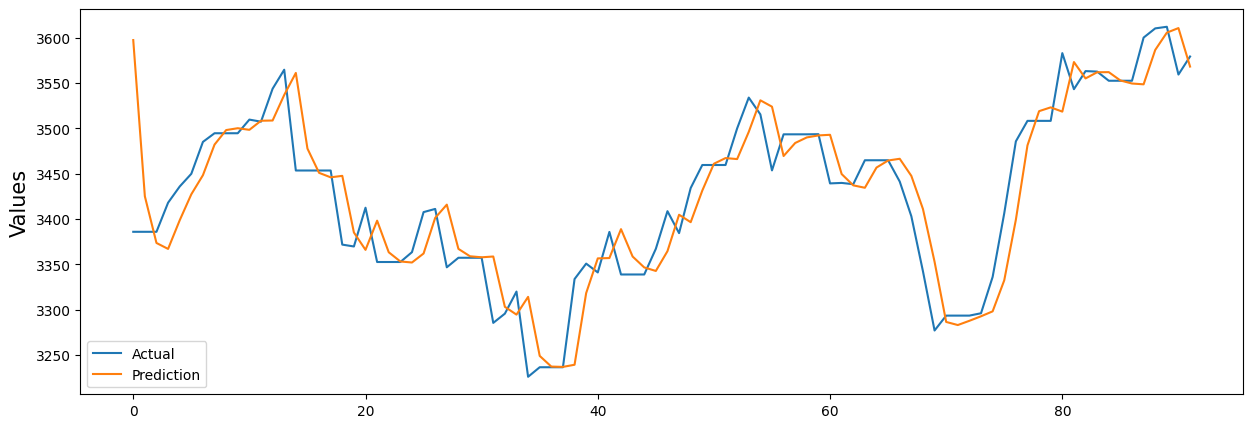

     prediction       actual
0   3597.440801  3386.010010
1   3425.150067  3386.010010
2   3373.689476  3386.010010
3   3367.140784  3418.090088
4   3398.681207  3435.949951
..          ...          ...
87  3548.624171  3600.159912
88  3586.529941  3610.310059
89  3605.609880  3612.090088
90  3610.650172  3559.409912
91  3568.205882  3579.310059

[92 rows x 2 columns]
RMSE = 42.96934856377082, MSE = 1846.3649159948336, MAE = 28.942725059792615, MAPE = 0.008480876582582274
CPU times: total: 59.3 s
Wall time: 25.1 s


In [9]:
%%time
gru = nn.make_rnn(dataset,
                  look_back = 25,
#                   hidden_layers = 3,
#                   units = [64,128,64],
                  hidden_layers = 1,
                  units = 64,
                  train_size = 0.95,
                  type = "GRU",
                  dropout = 0.0,
                  batch_size = 12,
                  maxPlot = 100)

3/3 [==============================] - 1s 82ms/step


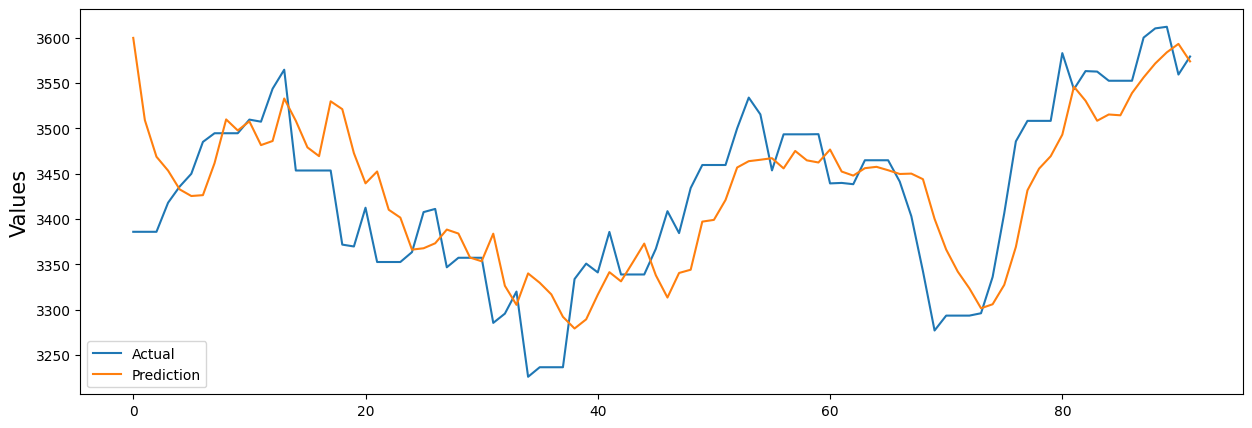

     prediction       actual
0   3599.837471  3386.010010
1   3509.167943  3386.010010
2   3468.795454  3386.010010
3   3453.480535  3418.090088
4   3432.762872  3435.949951
..          ...          ...
87  3556.234713  3600.159912
88  3571.607615  3610.310059
89  3583.920595  3612.090088
90  3593.225218  3559.409912
91  3573.934961  3579.310059

[92 rows x 2 columns]
RMSE = 59.73483213294364, MSE = 3568.2501699509558, MAE = 46.68839016621379, MAPE = 0.013707726580094974
CPU times: total: 8min 53s
Wall time: 2min 53s


In [10]:
%%time
transformer = nn.make_transformer(dataset, 
                    look_back = 25, 
                    train_size = 0.95,
                    maxPlot = 100, 
                    batch_size = 36,
                    epochs = 20,
                    verbose = 0,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

Сгенерируем ненатреннированные модели с уже подобранными параметрами, <br> и создаздим ансамблевую модель, которая будет работать по принципу взвешенного среднего, <br> основываясь на оценке ошибки RMSE.

3/3 [==============================] - 0s 2ms/step
model 0 : <class 'keras.engine.sequential.Sequential'>, rmse = 47.21653211810959 

3/3 [==============================] - 0s 4ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 44.006052017340934 

3/3 [==============================] - 0s 60ms/step
model 2 : <class 'keras.engine.functional.Functional'>, rmse = 50.38979766665741 



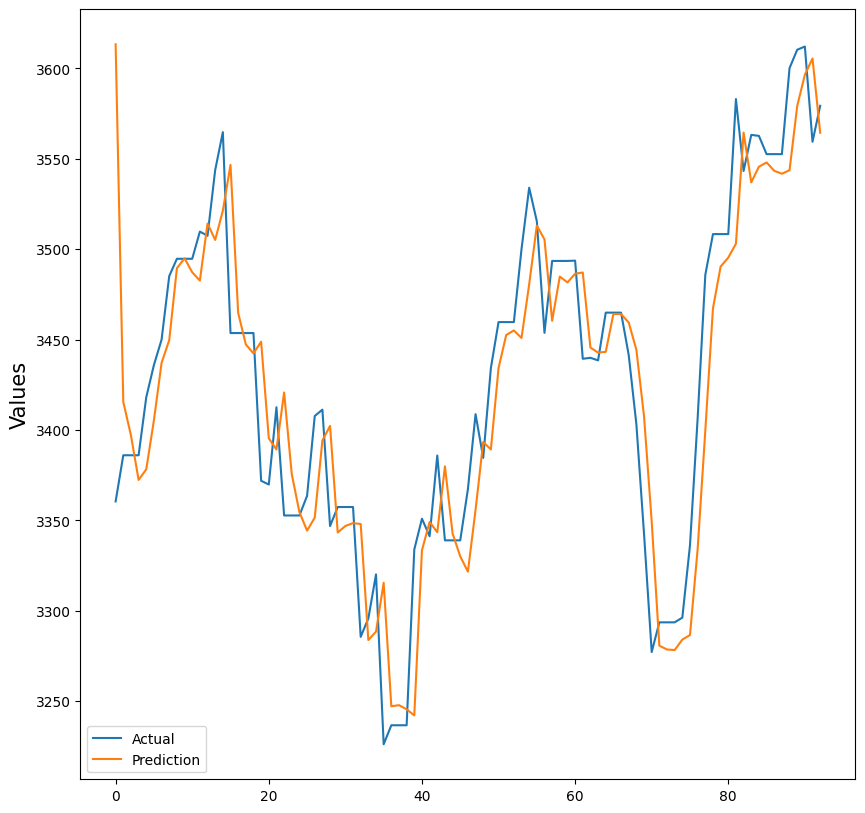

     prediction       actual
0   3613.339519  3360.479980
1   3415.511907  3386.010010
2   3397.023429  3386.010010
3   3372.350731  3386.010010
4   3378.262879  3418.090088
..          ...          ...
88  3543.673392  3600.159912
89  3579.138438  3610.310059
90  3596.481078  3612.090088
91  3605.484052  3559.409912
92  3564.408540  3579.310059

[93 rows x 2 columns]
RMSE = 45.401498590038706, MSE = 2061.2960742212867, MAE = 30.85089665833072, MAPE = 0.009037638084302777
CPU times: total: 12min 49s
Wall time: 3min 22s


45.401498590038706

In [23]:
%%time
en_transformer = nn.generate_transformer(
                    look_back = 25,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

en_lstm = nn.generate_rnn(look_back = 25,
                    hidden_layers = 1,
                    units = 64,
                    type = "LSTM",
                    dropout = 0.0)

en_cnn = nn.generate_cnn(look_back = 25,
                hidden_layers = 1,
                kernel_size = 2,
                filters = 64,
                dilation_rate = 1,
                dilation_mode = "multiplicative")
from TSEnsemble.ensemble import Ensemble
ensemble_model = Ensemble(models = [en_cnn, en_lstm, en_transformer], regressor = 'wmean')
ensemble_model.fit(dataset, 
                   train_size = 0.95, 
                   look_back = 25, 
                   val_size = 0.15, 
                   train_models_size = 0.7, 
                   epochs = 20, 
                   batch_size = 12, 
                   metric = "rmse")
ensemble_model.eval(get="rmse")


In [ ]:
ensemble_model = Ensemble(models = [en_cnn, en_lstm, en_transformer],
                          regressor = 'catboost', 
                          regr_params ={'task_type' : "GPU",
                                        'devices' : '0:1',
                                       'verbose': 0})
ensemble_model.fit(dataset, 
                   train_size = 0.95, 
                   look_back = 25, 
                   val_size = 0.15, 
                   train_models_size = 0.7, 
                   epochs = 20, 
                   batch_size = 12, 
                  fit_models = False,
                   metric = "rmse")
ensemble_model.eval(get="rmse")

Также построим CNN LSTM модель.

6/6 [==============================] - 1s 5ms/step


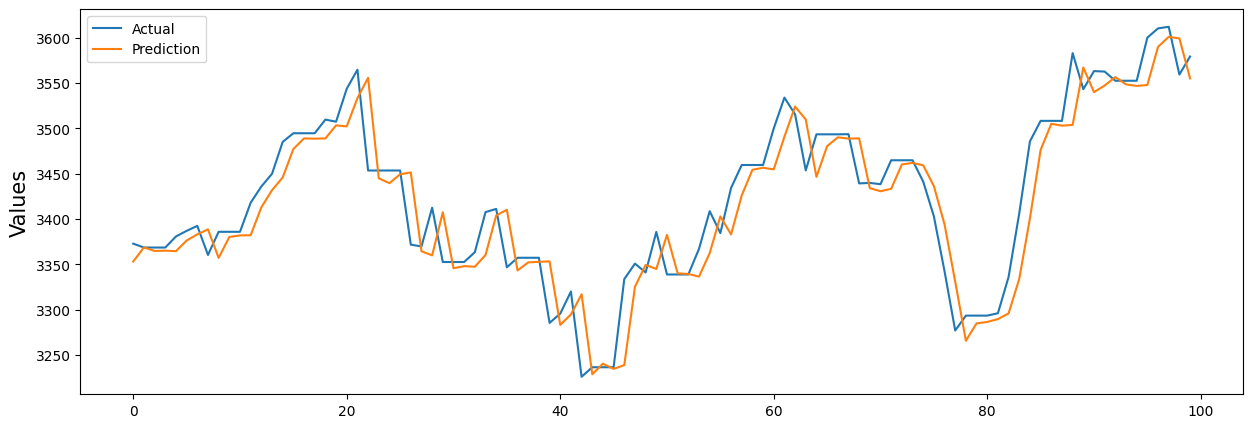

      prediction       actual
0    3361.406099  2948.050049
1    3014.538215  2948.050049
2    2923.830849  2948.050049
3    2973.823491  2948.050049
4    2935.542493  3004.080078
..           ...          ...
178  3547.926131  3600.159912
179  3589.964149  3610.310059
180  3600.993832  3612.090088
181  3599.250932  3559.409912
182  3555.245656  3579.310059

[183 rows x 2 columns]
RMSE = 46.52902254923563, MSE = 2164.9499393872775, MAE = 26.83507379730501, MAPE = 0.008247372039883806
CPU times: total: 1min 31s
Wall time: 35.3 s


In [17]:
%%time
seq = nn.make_seq_model(dataset, 
            layers = ["cnn", "lstm", "lstm", "lstm"], 
            look_back = 25, 
            units = [64, 64, 64],
            filters = 64,
            horizon = 1, 
            dropout = 0.0, 
            n_features = 1, 
            kernel_size = 2, 
            dilation_rate = 1, 
            dilation_mode = "multiplicative",
            optimizer = "Adam",
            loss = "mae",
            train_size = 0.9, 
            plot = True,
            batch_size = 12,
            epochs = 20,
            maxPlot = 100, 
            fig_size = (15, 5))

Построим предсказания на следующие n значений используя некоторые из моделей.

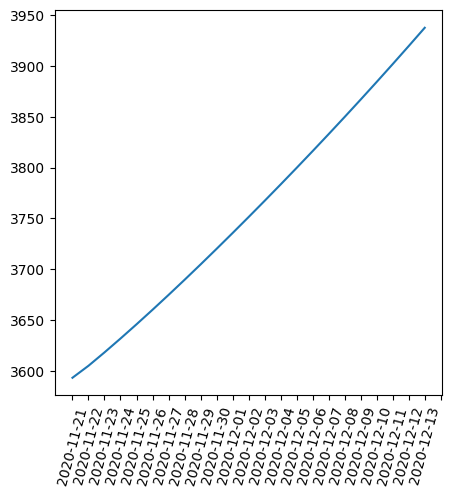

CPU times: total: 1.34 s
Wall time: 1.23 s


,predictions
2020-11-21,3593.082988
2020-11-22,3604.877617
2020-11-23,3618.052657
2020-11-24,3631.689565
2020-11-25,3645.684178
2020-11-26,3659.993559
2020-11-27,3674.594914
2020-11-28,3689.469266
2020-11-29,3704.593397
2020-11-30,3719.944088


In [18]:
%%time
utils.model_forecast(lstm, dataset, 23, fig_size = (5,5))

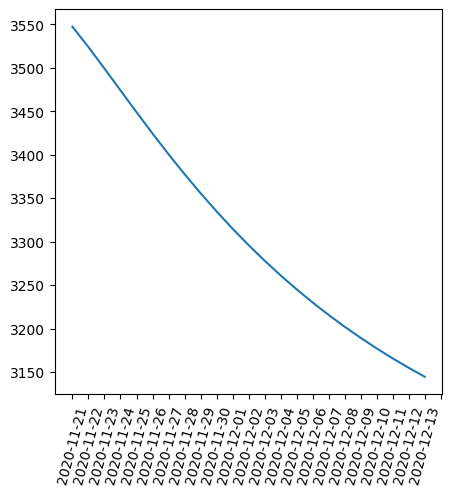

CPU times: total: 1.27 s
Wall time: 1.21 s


,predictions
2020-11-21,3547.390155
2020-11-22,3523.959234
2020-11-23,3499.266962
2020-11-24,3474.122045
2020-11-25,3449.081132
2020-11-26,3424.522336
2020-11-27,3400.694536
2020-11-28,3377.754267
2020-11-29,3355.790797
2020-11-30,3334.847275


In [19]:
%%time
utils.model_forecast(gru, dataset, 23, fig_size = (5,5))

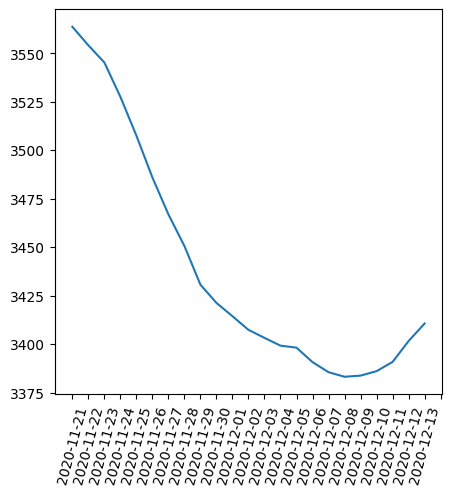

CPU times: total: 3.58 s
Wall time: 3.33 s


,predictions
2020-11-21,3563.686730
2020-11-22,3554.107145
2020-11-23,3545.262880
2020-11-24,3527.552118
2020-11-25,3507.539607
2020-11-26,3485.955474
2020-11-27,3466.918900
2020-11-28,3450.585804
2020-11-29,3430.649914
2020-11-30,3421.257945


In [20]:
%%time
ensemble_model.forecast(dataset, 23, fig_size = (5,5))